In [23]:
# %%
# Carga de datos
import pandas as pd  #  type: ignore

pd.set_option("display.notebook_repr_html", False)

csv_url = (
    "https://raw.githubusercontent.com/jdvelasq/playground/master/datasets/flights.csv"
)

flights = pd.read_csv(
    csv_url,
    sep=",",
    thousands=None,
    decimal=".",
)

flights.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               99999 non-null  int64  
 1   Month              99999 non-null  int64  
 2   DayofMonth         99999 non-null  int64  
 3   DayOfWeek          99999 non-null  int64  
 4   DepTime            98857 non-null  float64
 5   CRSDepTime         99999 non-null  int64  
 6   ArrTime            98697 non-null  float64
 7   CRSArrTime         99999 non-null  int64  
 8   UniqueCarrier      99999 non-null  object 
 9   FlightNum          99999 non-null  int64  
 10  TailNum            98857 non-null  object 
 11  ActualElapsedTime  98697 non-null  float64
 12  CRSElapsedTime     99999 non-null  int64  
 13  AirTime            98697 non-null  float64
 14  ArrDelay           98697 non-null  float64
 15  DepDelay           98857 non-null  float64
 16  Origin             999

In [24]:
# %%
# Estadistiacas de las columnas numericas
flights.describe()

          Year    Month    DayofMonth     DayOfWeek       DepTime  \
count  99999.0  99999.0  99999.000000  99999.000000  98857.000000   
mean    2008.0      1.0     17.087741      3.890059   1355.194827   
std        0.0      0.0      8.356321      1.953000    464.088277   
min     2008.0      1.0      1.000000      1.000000      1.000000   
25%     2008.0      1.0     10.000000      2.000000    942.000000   
50%     2008.0      1.0     17.000000      4.000000   1344.000000   
75%     2008.0      1.0     24.000000      5.000000   1743.000000   
max     2008.0      1.0     31.000000      7.000000   2359.000000   

         CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  99999.000000  98697.000000  99999.000000  99999.000000   
mean    1341.983470   1492.730964   1502.593996   1510.586886   
std      451.355345    496.372525    478.096654   1185.974280   
min      600.000000      1.000000      5.000000      1.000000   
25%      940.000000   1114.000000   1120.000000    50

In [25]:
# %%
# Memory usage en MB del DataFrame
memory_usage = flights.memory_usage(deep=True).sum() / (1024**2)
print(f"Memory usage: {memory_usage:.2f} MB")

# Tamaño del csv (csv_url) en MB
import requests
response = requests.head(csv_url)
csv_size = int(response.headers.get('Content-Length', 0)) / (1024**2)
print(f"CSV size: {csv_size:.2f} MB")


Memory usage: 41.38 MB
CSV size: 2.45 MB


In [26]:
# %%
# Cómputo del total de registros de la tabla
numTotalFlights = len(flights)
numTotalFlights

99999

In [27]:
# %%
# Filtrado de registros para vuelos retrasados
# Un vuelo con un retraso mayor a 15 minutos se considera retrasado
# (columna DepDelay).
delayedFlights = flights[flights["DepDelay"] > 15][["UniqueCarrier", "DepDelay"]]
delayedFlights.head(5)

   UniqueCarrier  DepDelay
1             WN      19.0
4             WN      34.0
5             WN      25.0
6             WN      67.0
11            WN      94.0

In [28]:
# %%
# Cálculo del porcentaje de vuelos retrasados
numDelayedFlights = len(delayedFlights)
print(
    "Porcentaje de vuelos retrasados: "
    + str(round(numDelayedFlights / numTotalFlights * 100, 2))
)

Porcentaje de vuelos retrasados: 19.59


In [29]:
# %%
# # Copia de una tabla y copia de columnas
flightsWithDelays = flights[
    [
        "Year",
        "Month",
        "DayofMonth",
        "UniqueCarrier",
        "FlightNum",
        "DepDelay",
    ]
].copy()

flightsWithDelays["IsDelayed"] = flightsWithDelays["DepDelay"].copy()

In [30]:
# %%
# Conteo de registros nulos en una columna
flightsWithDelays.IsDelayed.isna().sum()

np.int64(1142)

In [31]:
# %%
# Aplicación de una función a una columna
flightsWithDelays["IsDelayed"] = flightsWithDelays["IsDelayed"].map(
    lambda x: 0 if pd.isna(x) else x
)
flightsWithDelays["IsDelayed"] = flightsWithDelays["IsDelayed"].map(
    lambda x: 1 if x > 15 else 0
)

flightsWithDelays[["DepDelay", "IsDelayed"]].head(10)

   DepDelay  IsDelayed
0       8.0          0
1      19.0          1
2       8.0          0
3      -4.0          0
4      34.0          1
5      25.0          1
6      67.0          1
7      -1.0          0
8       2.0          0
9       0.0          0

In [32]:
# %%
# Cálculo del porcentaje de vuelos retrasados
print(
    "Porcentaje de vuelos retrasados: {:4.2f} %".format(
        100 * flightsWithDelays.IsDelayed.sum() / flightsWithDelays.DepDelay.count()
    )
)

Porcentaje de vuelos retrasados: 19.81 %


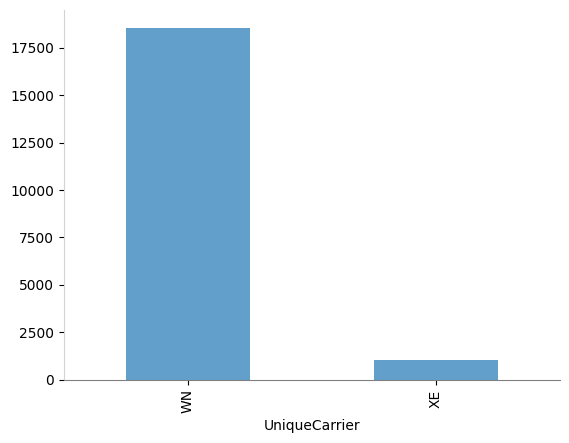

In [ ]:
# %%
# Cantidad de vuelos retrasados por transportador
import os
import matplotlib.pyplot as plt  #  type: ignore

if not os.path.exists("../files/images"):
    os.makedirs("../files/images")

flights["IsDelayed"] = flights["DepDelay"].copy()
flights["IsDelayed"] = flights["IsDelayed"].map(lambda x: 0 if pd.isna(x) else x)
flights["IsDelayed"] = flights["IsDelayed"].map(lambda x: int(x > 15))
(flights.groupby("UniqueCarrier").sum())["IsDelayed"].plot.bar(
    color="tab:blue",
    alpha=0.7,
)

plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.savefig(
    "../files/images/delays_by_carrier.png",
)
plt.show()